In [4]:
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import pandas as pd
import numpy as np

from xgb_params import xgb_params

from xgboost import XGBRegressor

# Hyper Parameter Tuning

In [5]:
train_path = 'processed/processed_train_2.csv'

train_df = pd.read_csv(train_path)
y = train_df['price_doc']
X = train_df.drop(['price_doc'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "n_estimators":  trial.suggest_int("n_estimators", 100, 500),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int('mind_child_weight', 0, 12),
        "gamma": trial.suggest_float("gamma", 0, 1),
    }
    
    scores = []
    # for fold_idx, (train_idx, valid_idx) in enumerate(fold.split(range(len(dataset)))):
    regressor =  XGBRegressor(
                        device=xgb_params['device'],
                        objective=xgb_params['objective'],
                        eval_metric=xgb_params['eval_metric'],
                        enable_categorical=xgb_params['enable_categorical'],
                        early_stopping_rounds=xgb_params['early_stopping_rounds'],
                        n_jobs=xgb_params['n_jobs'],
                        **params
                )
    
    regressor.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    y_pred = regressor.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
best_params = study.best_params

[I 2023-11-01 09:19:35,486] A new study created in memory with name: no-name-7fceee49-d5ea-4243-9b32-a15acd97f3d1
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and wil

[0]	validation_0-rmsle:0.62267
[1]	validation_0-rmsle:0.62112
[2]	validation_0-rmsle:0.61938
[3]	validation_0-rmsle:0.61790
[4]	validation_0-rmsle:0.61568
[5]	validation_0-rmsle:0.61429
[6]	validation_0-rmsle:0.61286
[7]	validation_0-rmsle:0.61071
[8]	validation_0-rmsle:0.60943
[9]	validation_0-rmsle:0.60739
[10]	validation_0-rmsle:0.60538
[11]	validation_0-rmsle:0.60440
[12]	validation_0-rmsle:0.60249
[13]	validation_0-rmsle:0.60058
[14]	validation_0-rmsle:0.59970
[15]	validation_0-rmsle:0.59855
[16]	validation_0-rmsle:0.59736
[17]	validation_0-rmsle:0.59596
[18]	validation_0-rmsle:0.59519
[19]	validation_0-rmsle:0.59343
[20]	validation_0-rmsle:0.59215
[21]	validation_0-rmsle:0.59136
[22]	validation_0-rmsle:0.59055
[23]	validation_0-rmsle:0.58981
[24]	validation_0-rmsle:0.58811
[25]	validation_0-rmsle:0.58730
[26]	validation_0-rmsle:0.58570
[27]	validation_0-rmsle:0.58452
[28]	validation_0-rmsle:0.58337
[29]	validation_0-rmsle:0.58238
[30]	validation_0-rmsle:0.58086
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[09:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.



[0]	validation_0-rmsle:0.62450
[1]	validation_0-rmsle:0.62392
[2]	validation_0-rmsle:0.62335
[3]	validation_0-rmsle:0.62279
[4]	validation_0-rmsle:0.62223


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[5]	validation_0-rmsle:0.62167
[6]	validation_0-rmsle:0.62112
[7]	validation_0-rmsle:0.62057
[8]	validation_0-rmsle:0.62017
[9]	validation_0-rmsle:0.61963
[10]	validation_0-rmsle:0.61910
[11]	validation_0-rmsle:0.61857
[12]	validation_0-rmsle:0.61804
[13]	validation_0-rmsle:0.61752
[14]	validation_0-rmsle:0.61701
[15]	validation_0-rmsle:0.61650
[16]	validation_0-rmsle:0.61600
[17]	validation_0-rmsle:0.61550
[18]	validation_0-rmsle:0.61500
[19]	validation_0-rmsle:0.61451
[20]	validation_0-rmsle:0.61402
[21]	validation_0-rmsle:0.61353
[22]	validation_0-rmsle:0.61304
[23]	validation_0-rmsle:0.61257
[24]	validation_0-rmsle:0.61210
[25]	validation_0-rmsle:0.61162
[26]	validation_0-rmsle:0.61115
[27]	validation_0-rmsle:0.61067
[28]	validation_0-rmsle:0.61022
[29]	validation_0-rmsle:0.60975
[30]	validation_0-rmsle:0.60929
[31]	validation_0-rmsle:0.60885
[32]	validation_0-rmsle:0.60841
[33]	validation_0-rmsle:0.60796
[34]	validation_0-rmsle:0.60752
[35]	validation_0-rmsle:0.60709
[36]	validati

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:19:43,403] Trial 1 finished with value: 3828309.825570536 and parameters: {'learning_rate': 0.0025673011938509775, 'n_estimators': 168, 'colsample_bytree': 0.928067487978754, 'max_depth': 3, 'mind_child_weight': 9, 'gamma': 0.5435057920605715}. Best is trial 0 with value: 2686900.2587483996.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.60138
[1]	validation_0-rmsle:0.58243
[2]	validation_0-rmsle:0.56691
[3]	validation_0-rmsle:0.55345
[4]	validation_0-rmsle:0.54185
[5]	validation_0-rmsle:0.53144
[6]	validation_0-rmsle:0.52301
[7]	validation_0-rmsle:0.51589
[8]	validation_0-rmsle:0.50950
[9]	validation_0-rmsle:0.50361
[10]	validation_0-rmsle:0.49878
[11]	validation_0-rmsle:0.49577
[12]	validation_0-rmsle:0.49183
[13]	validation_0-rmsle:0.48828
[14]	validation_0-rmsle:0.48505
[15]	validation_0-rmsle:0.48299
[16]	validation_0-rmsle:0.48099
[17]	validation_0-rmsle:0.47922
[18]	validation_0-rmsle:0.47765
[19]	validation_0-rmsle:0.47612
[20]	validation_0-rmsle:0.47485
[21]	validation_0-rmsle:0.47360
[22]	validation_0-rmsle:0.47266
[23]	validation_0-rmsle:0.47171
[24]	validation_0-rmsle:0.47117
[25]	validation_0-rmsle:0.47066
[26]	validation_0-rmsle:0.47008
[27]	validation_0-rmsle:0.46947
[28]	validation_0-rmsle:0.46908
[29]	validation_0-rmsle:0.46844
[30]	validation_0-rmsle:0.46806
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:19:48,923] Trial 2 finished with value: 2573307.148400781 and parameters: {'learning_rate': 0.08995142921519636, 'n_estimators': 354, 'colsample_bytree': 0.6533514683698636, 'max_depth': 10, 'mind_child_weight': 2, 'gamma': 0.8905228437312355}. Best is trial 2 with value: 2573307.148400781.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

[0]	validation_0-rmsle:0.62249
[1]	validation_0-rmsle:0.61993
[2]	validation_0-rmsle:0.61743
[3]	validation_0-rmsle:0.61507
[4]	validation_0-rmsle:0.61269
[5]	validation_0-rmsle:0.61035
[6]	validation_0-rmsle:0.60825
[7]	validation_0-rmsle:0.60599
[8]	validation_0-rmsle:0.60399
[9]	validation_0-rmsle:0.60185
[10]	validation_0-rmsle:0.59976
[11]	validation_0-rmsle:0.59768
[12]	validation_0-rmsle:0.59566
[13]	validation_0-rmsle:0.59368
[14]	validation_0-rmsle:0.59176
[15]	validation_0-rmsle:0.58980
[16]	validation_0-rmsle:0.58796
[17]	validation_0-rmsle:0.58614
[18]	validation_0-rmsle:0.58438
[19]	validation_0-rmsle:0.58262
[20]	validation_0-rmsle:0.58090
[21]	validation_0-rmsle:0.57919
[22]	validation_0-rmsle:0.57749
[23]	validation_0-rmsle:0.57578
[24]	validation_0-rmsle:0.57417
[25]	validation_0-rmsle:0.57266
[26]	validation_0-rmsle:0.57111
[27]	validation_0-rmsle:0.56955
[28]	validation_0-rmsle:0.56799
[29]	validation_0-rmsle:0.56646
[30]	validation_0-rmsle:0.56498
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:09,422] Trial 3 finished with value: 2537103.0494933315 and parameters: {'learning_rate': 0.009245627042963837, 'n_estimators': 412, 'colsample_bytree': 0.8600688577264081, 'max_depth': 10, 'mind_child_weight': 8, 'gamma': 0.11350659114074824}. Best is trial 3 with value: 2537103.0494933315.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isi

[0]	validation_0-rmsle:0.62374
[1]	validation_0-rmsle:0.62242
[2]	validation_0-rmsle:0.62112
[3]	validation_0-rmsle:0.61985
[4]	validation_0-rmsle:0.61863
[5]	validation_0-rmsle:0.61744


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[6]	validation_0-rmsle:0.61654
[7]	validation_0-rmsle:0.61536
[8]	validation_0-rmsle:0.61450
[9]	validation_0-rmsle:0.61337
[10]	validation_0-rmsle:0.61226
[11]	validation_0-rmsle:0.61145
[12]	validation_0-rmsle:0.61034
[13]	validation_0-rmsle:0.60927
[14]	validation_0-rmsle:0.60823
[15]	validation_0-rmsle:0.60716
[16]	validation_0-rmsle:0.60644
[17]	validation_0-rmsle:0.60544
[18]	validation_0-rmsle:0.60445
[19]	validation_0-rmsle:0.60343
[20]	validation_0-rmsle:0.60247
[21]	validation_0-rmsle:0.60148
[22]	validation_0-rmsle:0.60054
[23]	validation_0-rmsle:0.59962
[24]	validation_0-rmsle:0.59871
[25]	validation_0-rmsle:0.59799
[26]	validation_0-rmsle:0.59709
[27]	validation_0-rmsle:0.59617
[28]	validation_0-rmsle:0.59530
[29]	validation_0-rmsle:0.59445
[30]	validation_0-rmsle:0.59356
[31]	validation_0-rmsle:0.59272
[32]	validation_0-rmsle:0.59185
[33]	validation_0-rmsle:0.59103
[34]	validation_0-rmsle:0.59018
[35]	validation_0-rmsle:0.58954
[36]	validation_0-rmsle:0.58893
[37]	validat

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:11,907] Trial 4 finished with value: 3237285.866541536 and parameters: {'learning_rate': 0.0059702524976925735, 'n_estimators': 201, 'colsample_bytree': 0.7899508116801917, 'max_depth': 3, 'mind_child_weight': 10, 'gamma': 0.7420103321227272}. Best is trial 3 with value: 2537103.0494933315.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isin

[0]	validation_0-rmsle:0.61004
[1]	validation_0-rmsle:0.59679
[2]	validation_0-rmsle:0.58476
[3]	validation_0-rmsle:0.57428
[4]	validation_0-rmsle:0.56506
[5]	validation_0-rmsle:0.55672
[6]	validation_0-rmsle:0.54937
[7]	validation_0-rmsle:0.54227
[8]	validation_0-rmsle:0.53621
[9]	validation_0-rmsle:0.53026
[10]	validation_0-rmsle:0.52482
[11]	validation_0-rmsle:0.52051
[12]	validation_0-rmsle:0.51591
[13]	validation_0-rmsle:0.51175
[14]	validation_0-rmsle:0.50769
[15]	validation_0-rmsle:0.50410
[16]	validation_0-rmsle:0.50112
[17]	validation_0-rmsle:0.49832
[18]	validation_0-rmsle:0.49575
[19]	validation_0-rmsle:0.49329
[20]	validation_0-rmsle:0.49112
[21]	validation_0-rmsle:0.48907
[22]	validation_0-rmsle:0.48711
[23]	validation_0-rmsle:0.48538
[24]	validation_0-rmsle:0.48376
[25]	validation_0-rmsle:0.48244
[26]	validation_0-rmsle:0.48121
[27]	validation_0-rmsle:0.47998
[28]	validation_0-rmsle:0.47877
[29]	validation_0-rmsle:0.47778
[30]	validation_0-rmsle:0.47675
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:17,397] Trial 5 finished with value: 2530264.404967158 and parameters: {'learning_rate': 0.056852217661580925, 'n_estimators': 362, 'colsample_bytree': 0.8113626546341496, 'max_depth': 9, 'mind_child_weight': 8, 'gamma': 0.6037976860303381}. Best is trial 5 with value: 2530264.404967158.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

[0]	validation_0-rmsle:0.62418
[1]	validation_0-rmsle:0.62329
[2]	validation_0-rmsle:0.62242


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[3]	validation_0-rmsle:0.62155
[4]	validation_0-rmsle:0.62067
[5]	validation_0-rmsle:0.61981
[6]	validation_0-rmsle:0.61897
[7]	validation_0-rmsle:0.61812
[8]	validation_0-rmsle:0.61743
[9]	validation_0-rmsle:0.61659
[10]	validation_0-rmsle:0.61578
[11]	validation_0-rmsle:0.61497
[12]	validation_0-rmsle:0.61417
[13]	validation_0-rmsle:0.61337
[14]	validation_0-rmsle:0.61260
[15]	validation_0-rmsle:0.61183
[16]	validation_0-rmsle:0.61106
[17]	validation_0-rmsle:0.61031
[18]	validation_0-rmsle:0.60953
[19]	validation_0-rmsle:0.60879
[20]	validation_0-rmsle:0.60805
[21]	validation_0-rmsle:0.60731
[22]	validation_0-rmsle:0.60658
[23]	validation_0-rmsle:0.60586
[24]	validation_0-rmsle:0.60515
[25]	validation_0-rmsle:0.60443
[26]	validation_0-rmsle:0.60373
[27]	validation_0-rmsle:0.60302
[28]	validation_0-rmsle:0.60233
[29]	validation_0-rmsle:0.60163
[30]	validation_0-rmsle:0.60095
[31]	validation_0-rmsle:0.60028
[32]	validation_0-rmsle:0.59959
[33]	validation_0-rmsle:0.59892
[34]	validation

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:23,541] Trial 6 finished with value: 3055614.162317405 and parameters: {'learning_rate': 0.0032602029483942566, 'n_estimators': 314, 'colsample_bytree': 0.9497559023777064, 'max_depth': 6, 'mind_child_weight': 1, 'gamma': 0.5923699136263436}. Best is trial 5 with value: 2530264.404967158.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.62106
[1]	validation_0-rmsle:0.61724
[2]	validation_0-rmsle:0.61360


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[3]	validation_0-rmsle:0.61010
[4]	validation_0-rmsle:0.60678
[5]	validation_0-rmsle:0.60356
[6]	validation_0-rmsle:0.60112
[7]	validation_0-rmsle:0.59811
[8]	validation_0-rmsle:0.59582
[9]	validation_0-rmsle:0.59300
[10]	validation_0-rmsle:0.59030
[11]	validation_0-rmsle:0.58825
[12]	validation_0-rmsle:0.58569
[13]	validation_0-rmsle:0.58328
[14]	validation_0-rmsle:0.58089
[15]	validation_0-rmsle:0.57866
[16]	validation_0-rmsle:0.57653
[17]	validation_0-rmsle:0.57439
[18]	validation_0-rmsle:0.57227
[19]	validation_0-rmsle:0.57031
[20]	validation_0-rmsle:0.56827
[21]	validation_0-rmsle:0.56636
[22]	validation_0-rmsle:0.56444
[23]	validation_0-rmsle:0.56270
[24]	validation_0-rmsle:0.56091
[25]	validation_0-rmsle:0.55945
[26]	validation_0-rmsle:0.55782
[27]	validation_0-rmsle:0.55616
[28]	validation_0-rmsle:0.55464
[29]	validation_0-rmsle:0.55306
[30]	validation_0-rmsle:0.55160
[31]	validation_0-rmsle:0.55012
[32]	validation_0-rmsle:0.54875
[33]	validation_0-rmsle:0.54734
[34]	validation

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:28,387] Trial 7 finished with value: 2565143.488502136 and parameters: {'learning_rate': 0.016348990882919055, 'n_estimators': 396, 'colsample_bytree': 0.8094425601036614, 'max_depth': 4, 'mind_child_weight': 2, 'gamma': 0.13018179612582859}. Best is trial 5 with value: 2530264.404967158.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.61334
[1]	validation_0-rmsle:0.60280
[2]	validation_0-rmsle:0.59312
[3]	validation_0-rmsle:0.58415
[4]	validation_0-rmsle:0.57602
[5]	validation_0-rmsle:0.56878
[6]	validation_0-rmsle:0.56238
[7]	validation_0-rmsle:0.55588
[8]	validation_0-rmsle:0.55034
[9]	validation_0-rmsle:0.54471
[10]	validation_0-rmsle:0.53956
[11]	validation_0-rmsle:0.53529
[12]	validation_0-rmsle:0.53094
[13]	validation_0-rmsle:0.52668
[14]	validation_0-rmsle:0.52277
[15]	validation_0-rmsle:0.51913
[16]	validation_0-rmsle:0.51625
[17]	validation_0-rmsle:0.51299
[18]	validation_0-rmsle:0.51000
[19]	validation_0-rmsle:0.50710
[20]	validation_0-rmsle:0.50453
[21]	validation_0-rmsle:0.50203
[22]	validation_0-rmsle:0.49972
[23]	validation_0-rmsle:0.49752
[24]	validation_0-rmsle:0.49550
[25]	validation_0-rmsle:0.49380
[26]	validation_0-rmsle:0.49187
[27]	validation_0-rmsle:0.49017
[28]	validation_0-rmsle:0.48853
[29]	validation_0-rmsle:0.48711
[30]	validation_0-rmsle:0.48573
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:35,770] Trial 8 finished with value: 2526515.69084401 and parameters: {'learning_rate': 0.04287752305584172, 'n_estimators': 408, 'colsample_bytree': 0.7975846946910844, 'max_depth': 10, 'mind_child_weight': 11, 'gamma': 0.027430678904414196}. Best is trial 8 with value: 2526515.69084401.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.62217
[1]	validation_0-rmsle:0.61940


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[2]	validation_0-rmsle:0.61669
[3]	validation_0-rmsle:0.61405
[4]	validation_0-rmsle:0.61148
[5]	validation_0-rmsle:0.60943
[6]	validation_0-rmsle:0.60723
[7]	validation_0-rmsle:0.60489
[8]	validation_0-rmsle:0.60285
[9]	validation_0-rmsle:0.60052
[10]	validation_0-rmsle:0.59824
[11]	validation_0-rmsle:0.59699
[12]	validation_0-rmsle:0.59482
[13]	validation_0-rmsle:0.59268
[14]	validation_0-rmsle:0.59063
[15]	validation_0-rmsle:0.58902
[16]	validation_0-rmsle:0.58751
[17]	validation_0-rmsle:0.58583
[18]	validation_0-rmsle:0.58421
[19]	validation_0-rmsle:0.58229
[20]	validation_0-rmsle:0.58065
[21]	validation_0-rmsle:0.57875
[22]	validation_0-rmsle:0.57764
[23]	validation_0-rmsle:0.57581
[24]	validation_0-rmsle:0.57407
[25]	validation_0-rmsle:0.57302
[26]	validation_0-rmsle:0.57133
[27]	validation_0-rmsle:0.56967
[28]	validation_0-rmsle:0.56826
[29]	validation_0-rmsle:0.56665
[30]	validation_0-rmsle:0.56505
[31]	validation_0-rmsle:0.56349
[32]	validation_0-rmsle:0.56197
[33]	validation_

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:41,593] Trial 9 finished with value: 2618340.432400175 and parameters: {'learning_rate': 0.010467146981041064, 'n_estimators': 254, 'colsample_bytree': 0.6344768625536836, 'max_depth': 7, 'mind_child_weight': 2, 'gamma': 0.45335471127516425}. Best is trial 8 with value: 2526515.69084401.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

[0]	validation_0-rmsle:0.61769


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[1]	validation_0-rmsle:0.61376
[2]	validation_0-rmsle:0.60762
[3]	validation_0-rmsle:0.60399
[4]	validation_0-rmsle:0.59688
[5]	validation_0-rmsle:0.59350
[6]	validation_0-rmsle:0.58867
[7]	validation_0-rmsle:0.58265
[8]	validation_0-rmsle:0.57985
[9]	validation_0-rmsle:0.57437
[10]	validation_0-rmsle:0.57042
[11]	validation_0-rmsle:0.56825
[12]	validation_0-rmsle:0.56598
[13]	validation_0-rmsle:0.56380
[14]	validation_0-rmsle:0.56198
[15]	validation_0-rmsle:0.56014
[16]	validation_0-rmsle:0.55710
[17]	validation_0-rmsle:0.55557
[18]	validation_0-rmsle:0.55394
[19]	validation_0-rmsle:0.54964
[20]	validation_0-rmsle:0.54623
[21]	validation_0-rmsle:0.54475
[22]	validation_0-rmsle:0.54335
[23]	validation_0-rmsle:0.54210
[24]	validation_0-rmsle:0.54085
[25]	validation_0-rmsle:0.53957
[26]	validation_0-rmsle:0.53608
[27]	validation_0-rmsle:0.53343
[28]	validation_0-rmsle:0.53173
[29]	validation_0-rmsle:0.53084
[30]	validation_0-rmsle:0.52896
[31]	validation_0-rmsle:0.52796
[32]	validation_0

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:47,671] Trial 10 finished with value: 2602999.2181646046 and parameters: {'learning_rate': 0.03130538819856851, 'n_estimators': 491, 'colsample_bytree': 0.1711398786553539, 'max_depth': 8, 'mind_child_weight': 12, 'gamma': 0.30253506824538323}. Best is trial 8 with value: 2526515.69084401.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isins

[0]	validation_0-rmsle:0.60670
[1]	validation_0-rmsle:0.59137
[2]	validation_0-rmsle:0.57810
[3]	validation_0-rmsle:0.56618
[4]	validation_0-rmsle:0.55559
[5]	validation_0-rmsle:0.54622
[6]	validation_0-rmsle:0.53813
[7]	validation_0-rmsle:0.53073
[8]	validation_0-rmsle:0.52472
[9]	validation_0-rmsle:0.51858
[10]	validation_0-rmsle:0.51340
[11]	validation_0-rmsle:0.50915
[12]	validation_0-rmsle:0.50493
[13]	validation_0-rmsle:0.50100
[14]	validation_0-rmsle:0.49732
[15]	validation_0-rmsle:0.49421
[16]	validation_0-rmsle:0.49178
[17]	validation_0-rmsle:0.48955
[18]	validation_0-rmsle:0.48744
[19]	validation_0-rmsle:0.48528
[20]	validation_0-rmsle:0.48342
[21]	validation_0-rmsle:0.48161
[22]	validation_0-rmsle:0.48009
[23]	validation_0-rmsle:0.47872
[24]	validation_0-rmsle:0.47735
[25]	validation_0-rmsle:0.47642
[26]	validation_0-rmsle:0.47536
[27]	validation_0-rmsle:0.47435
[28]	validation_0-rmsle:0.47365
[29]	validation_0-rmsle:0.47288
[30]	validation_0-rmsle:0.47202
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:52,796] Trial 11 finished with value: 2535704.8647084404 and parameters: {'learning_rate': 0.06992266366611342, 'n_estimators': 330, 'colsample_bytree': 0.6936469609329384, 'max_depth': 9, 'mind_child_weight': 6, 'gamma': 0.34896351307529705}. Best is trial 8 with value: 2526515.69084401.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.61464
[1]	validation_0-rmsle:0.60544
[2]	validation_0-rmsle:0.59670
[3]	validation_0-rmsle:0.58887
[4]	validation_0-rmsle:0.58153
[5]	validation_0-rmsle:0.57497
[6]	validation_0-rmsle:0.56869
[7]	validation_0-rmsle:0.56284
[8]	validation_0-rmsle:0.55737
[9]	validation_0-rmsle:0.55213
[10]	validation_0-rmsle:0.54721
[11]	validation_0-rmsle:0.54268
[12]	validation_0-rmsle:0.53842
[13]	validation_0-rmsle:0.53435
[14]	validation_0-rmsle:0.53060
[15]	validation_0-rmsle:0.52697
[16]	validation_0-rmsle:0.52360
[17]	validation_0-rmsle:0.52048
[18]	validation_0-rmsle:0.51759
[19]	validation_0-rmsle:0.51482
[20]	validation_0-rmsle:0.51221
[21]	validation_0-rmsle:0.50980
[22]	validation_0-rmsle:0.50729
[23]	validation_0-rmsle:0.50516
[24]	validation_0-rmsle:0.50308
[25]	validation_0-rmsle:0.50103
[26]	validation_0-rmsle:0.49919
[27]	validation_0-rmsle:0.49740
[28]	validation_0-rmsle:0.49566
[29]	validation_0-rmsle:0.49417
[30]	validation_0-rmsle:0.49271
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:20:59,819] Trial 12 finished with value: 2507538.4781950614 and parameters: {'learning_rate': 0.038157830869263526, 'n_estimators': 258, 'colsample_bytree': 0.985898592609896, 'max_depth': 8, 'mind_child_weight': 6, 'gamma': 0.026980057157806485}. Best is trial 12 with value: 2507538.4781950614.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use is

[0]	validation_0-rmsle:0.61700


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[1]	validation_0-rmsle:0.60940
[2]	validation_0-rmsle:0.60269
[3]	validation_0-rmsle:0.59638
[4]	validation_0-rmsle:0.59057
[5]	validation_0-rmsle:0.58481
[6]	validation_0-rmsle:0.57945
[7]	validation_0-rmsle:0.57427
[8]	validation_0-rmsle:0.56993
[9]	validation_0-rmsle:0.56533
[10]	validation_0-rmsle:0.56102
[11]	validation_0-rmsle:0.55696
[12]	validation_0-rmsle:0.55307
[13]	validation_0-rmsle:0.54947
[14]	validation_0-rmsle:0.54588
[15]	validation_0-rmsle:0.54242
[16]	validation_0-rmsle:0.53929
[17]	validation_0-rmsle:0.53620
[18]	validation_0-rmsle:0.53333
[19]	validation_0-rmsle:0.53055
[20]	validation_0-rmsle:0.52794
[21]	validation_0-rmsle:0.52544
[22]	validation_0-rmsle:0.52304
[23]	validation_0-rmsle:0.52070
[24]	validation_0-rmsle:0.51853
[25]	validation_0-rmsle:0.51643
[26]	validation_0-rmsle:0.51436
[27]	validation_0-rmsle:0.51242
[28]	validation_0-rmsle:0.51056
[29]	validation_0-rmsle:0.50882
[30]	validation_0-rmsle:0.50712
[31]	validation_0-rmsle:0.50550
[32]	validation_0

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:03,083] Trial 13 finished with value: 2535457.4139359836 and parameters: {'learning_rate': 0.029822193123108496, 'n_estimators': 109, 'colsample_bytree': 0.9217435217667295, 'max_depth': 7, 'mind_child_weight': 5, 'gamma': 0.062435317895610326}. Best is trial 12 with value: 2507538.4781950614.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use i

[0]	validation_0-rmsle:0.61558
[1]	validation_0-rmsle:0.60674
[2]	validation_0-rmsle:0.59882
[3]	validation_0-rmsle:0.59162
[4]	validation_0-rmsle:0.58501
[5]	validation_0-rmsle:0.57860
[6]	validation_0-rmsle:0.57266
[7]	validation_0-rmsle:0.56713
[8]	validation_0-rmsle:0.56187
[9]	validation_0-rmsle:0.55701
[10]	validation_0-rmsle:0.55241
[11]	validation_0-rmsle:0.54796
[12]	validation_0-rmsle:0.54383
[13]	validation_0-rmsle:0.53993
[14]	validation_0-rmsle:0.53621
[15]	validation_0-rmsle:0.53276
[16]	validation_0-rmsle:0.52938
[17]	validation_0-rmsle:0.52633
[18]	validation_0-rmsle:0.52335
[19]	validation_0-rmsle:0.52048
[20]	validation_0-rmsle:0.51771
[21]	validation_0-rmsle:0.51519
[22]	validation_0-rmsle:0.51281
[23]	validation_0-rmsle:0.51060
[24]	validation_0-rmsle:0.50838
[25]	validation_0-rmsle:0.50639
[26]	validation_0-rmsle:0.50443
[27]	validation_0-rmsle:0.50256
[28]	validation_0-rmsle:0.50082
[29]	validation_0-rmsle:0.49910
[30]	validation_0-rmsle:0.49746
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:10,030] Trial 14 finished with value: 2495590.143651863 and parameters: {'learning_rate': 0.03447385098867853, 'n_estimators': 253, 'colsample_bytree': 0.9886740099397346, 'max_depth': 8, 'mind_child_weight': 4, 'gamma': 0.009857444277456745}. Best is trial 14 with value: 2495590.143651863.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isin

[0]	validation_0-rmsle:0.62478
[1]	validation_0-rmsle:0.62449


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[2]	validation_0-rmsle:0.62420
[3]	validation_0-rmsle:0.62391
[4]	validation_0-rmsle:0.62362
[5]	validation_0-rmsle:0.62333
[6]	validation_0-rmsle:0.62305
[7]	validation_0-rmsle:0.62276
[8]	validation_0-rmsle:0.62248
[9]	validation_0-rmsle:0.62219
[10]	validation_0-rmsle:0.62191
[11]	validation_0-rmsle:0.62162
[12]	validation_0-rmsle:0.62134
[13]	validation_0-rmsle:0.62106
[14]	validation_0-rmsle:0.62077
[15]	validation_0-rmsle:0.62049
[16]	validation_0-rmsle:0.62021
[17]	validation_0-rmsle:0.61993
[18]	validation_0-rmsle:0.61966
[19]	validation_0-rmsle:0.61938
[20]	validation_0-rmsle:0.61911
[21]	validation_0-rmsle:0.61883
[22]	validation_0-rmsle:0.61856
[23]	validation_0-rmsle:0.61828
[24]	validation_0-rmsle:0.61802
[25]	validation_0-rmsle:0.61775
[26]	validation_0-rmsle:0.61748
[27]	validation_0-rmsle:0.61721
[28]	validation_0-rmsle:0.61694
[29]	validation_0-rmsle:0.61668
[30]	validation_0-rmsle:0.61641
[31]	validation_0-rmsle:0.61615
[32]	validation_0-rmsle:0.61588
[33]	validation_

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:15,417] Trial 15 finished with value: 3931838.3011705177 and parameters: {'learning_rate': 0.0010558572723574264, 'n_estimators': 259, 'colsample_bytree': 0.9934951108975234, 'max_depth': 6, 'mind_child_weight': 4, 'gamma': 0.23675138421189135}. Best is trial 14 with value: 2495590.143651863.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use is

[0]	validation_0-rmsle:0.59941
[1]	validation_0-rmsle:0.57933
[2]	validation_0-rmsle:0.56277
[3]	validation_0-rmsle:0.54892
[4]	validation_0-rmsle:0.53715
[5]	validation_0-rmsle:0.52709
[6]	validation_0-rmsle:0.51869
[7]	validation_0-rmsle:0.51156
[8]	validation_0-rmsle:0.50581
[9]	validation_0-rmsle:0.50046
[10]	validation_0-rmsle:0.49588
[11]	validation_0-rmsle:0.49203
[12]	validation_0-rmsle:0.48839
[13]	validation_0-rmsle:0.48544
[14]	validation_0-rmsle:0.48293
[15]	validation_0-rmsle:0.48081
[16]	validation_0-rmsle:0.47916
[17]	validation_0-rmsle:0.47753
[18]	validation_0-rmsle:0.47625
[19]	validation_0-rmsle:0.47496
[20]	validation_0-rmsle:0.47417
[21]	validation_0-rmsle:0.47354
[22]	validation_0-rmsle:0.47256
[23]	validation_0-rmsle:0.47172
[24]	validation_0-rmsle:0.47118
[25]	validation_0-rmsle:0.47046
[26]	validation_0-rmsle:0.47013
[27]	validation_0-rmsle:0.46987
[28]	validation_0-rmsle:0.46946
[29]	validation_0-rmsle:0.46904
[30]	validation_0-rmsle:0.46872
[31]	validation_0-

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:19,403] Trial 16 finished with value: 2508698.7175102695 and parameters: {'learning_rate': 0.09874769427817806, 'n_estimators': 256, 'colsample_bytree': 0.9818961150375679, 'max_depth': 8, 'mind_child_weight': 4, 'gamma': 0.019553159198307777}. Best is trial 14 with value: 2495590.143651863.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isi

[0]	validation_0-rmsle:0.61879


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[1]	validation_0-rmsle:0.61417
[2]	validation_0-rmsle:0.60856
[3]	validation_0-rmsle:0.60324
[4]	validation_0-rmsle:0.59809
[5]	validation_0-rmsle:0.59446
[6]	validation_0-rmsle:0.59067
[7]	validation_0-rmsle:0.58614
[8]	validation_0-rmsle:0.58275
[9]	validation_0-rmsle:0.57850
[10]	validation_0-rmsle:0.57451
[11]	validation_0-rmsle:0.57237
[12]	validation_0-rmsle:0.56871
[13]	validation_0-rmsle:0.56522
[14]	validation_0-rmsle:0.56222
[15]	validation_0-rmsle:0.55982
[16]	validation_0-rmsle:0.55744
[17]	validation_0-rmsle:0.55475
[18]	validation_0-rmsle:0.55258
[19]	validation_0-rmsle:0.54966
[20]	validation_0-rmsle:0.54718
[21]	validation_0-rmsle:0.54569
[22]	validation_0-rmsle:0.54401
[23]	validation_0-rmsle:0.54181
[24]	validation_0-rmsle:0.53928
[25]	validation_0-rmsle:0.53779
[26]	validation_0-rmsle:0.53533
[27]	validation_0-rmsle:0.53330
[28]	validation_0-rmsle:0.53141
[29]	validation_0-rmsle:0.52919
[30]	validation_0-rmsle:0.52703
[31]	validation_0-rmsle:0.52499
[32]	validation_0

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:24,588] Trial 17 finished with value: 2575712.6367158988 and parameters: {'learning_rate': 0.022789068335814292, 'n_estimators': 183, 'colsample_bytree': 0.5171425128458629, 'max_depth': 8, 'mind_child_weight': 6, 'gamma': 0.2039747355245216}. Best is trial 14 with value: 2495590.143651863.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isin

[0]	validation_0-rmsle:0.61372
[1]	validation_0-rmsle:0.60356
[2]	validation_0-rmsle:0.59463


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[3]	validation_0-rmsle:0.58626
[4]	validation_0-rmsle:0.57878
[5]	validation_0-rmsle:0.57198
[6]	validation_0-rmsle:0.56646
[7]	validation_0-rmsle:0.56059
[8]	validation_0-rmsle:0.55596
[9]	validation_0-rmsle:0.55083
[10]	validation_0-rmsle:0.54623
[11]	validation_0-rmsle:0.54181
[12]	validation_0-rmsle:0.53784
[13]	validation_0-rmsle:0.53410
[14]	validation_0-rmsle:0.53076
[15]	validation_0-rmsle:0.52744
[16]	validation_0-rmsle:0.52453
[17]	validation_0-rmsle:0.52164
[18]	validation_0-rmsle:0.51898
[19]	validation_0-rmsle:0.51663
[20]	validation_0-rmsle:0.51417
[21]	validation_0-rmsle:0.51195
[22]	validation_0-rmsle:0.50995
[23]	validation_0-rmsle:0.50788
[24]	validation_0-rmsle:0.50614
[25]	validation_0-rmsle:0.50443
[26]	validation_0-rmsle:0.50287
[27]	validation_0-rmsle:0.50130
[28]	validation_0-rmsle:0.50007
[29]	validation_0-rmsle:0.49866
[30]	validation_0-rmsle:0.49734
[31]	validation_0-rmsle:0.49610
[32]	validation_0-rmsle:0.49493
[33]	validation_0-rmsle:0.49390
[34]	validation

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:28,645] Trial 18 finished with value: 2491204.309920353 and parameters: {'learning_rate': 0.04560121985309734, 'n_estimators': 284, 'colsample_bytree': 0.8872442400708895, 'max_depth': 5, 'mind_child_weight': 7, 'gamma': 0.1795763847094346}. Best is trial 18 with value: 2491204.309920353.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinst

[0]	validation_0-rmsle:0.61112
[1]	validation_0-rmsle:0.59893
[2]	validation_0-rmsle:0.58846


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[3]	validation_0-rmsle:0.57887
[4]	validation_0-rmsle:0.57050
[5]	validation_0-rmsle:0.56294
[6]	validation_0-rmsle:0.55677
[7]	validation_0-rmsle:0.55043
[8]	validation_0-rmsle:0.54545
[9]	validation_0-rmsle:0.54014
[10]	validation_0-rmsle:0.53536
[11]	validation_0-rmsle:0.53088
[12]	validation_0-rmsle:0.52700
[13]	validation_0-rmsle:0.52323
[14]	validation_0-rmsle:0.51992
[15]	validation_0-rmsle:0.51680
[16]	validation_0-rmsle:0.51407
[17]	validation_0-rmsle:0.51133
[18]	validation_0-rmsle:0.50893
[19]	validation_0-rmsle:0.50646
[20]	validation_0-rmsle:0.50443
[21]	validation_0-rmsle:0.50230
[22]	validation_0-rmsle:0.50050
[23]	validation_0-rmsle:0.49892
[24]	validation_0-rmsle:0.49725
[25]	validation_0-rmsle:0.49589
[26]	validation_0-rmsle:0.49450
[27]	validation_0-rmsle:0.49328
[28]	validation_0-rmsle:0.49211
[29]	validation_0-rmsle:0.49102
[30]	validation_0-rmsle:0.49005
[31]	validation_0-rmsle:0.48902
[32]	validation_0-rmsle:0.48813
[33]	validation_0-rmsle:0.48729
[34]	validation

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
[I 2023-11-01 09:21:31,765] Trial 19 finished with value: 2511678.1284262124 and parameters: {'learning_rate': 0.05641384100685418, 'n_estimators': 208, 'colsample_bytree': 0.8721489078563167, 'max_depth': 5, 'mind_child_weight': 4, 'gamma': 0.1963826081279405}. Best is trial 18 with value: 2491204.309920353.


{'learning_rate': 0.04560121985309734,
 'n_estimators': 284,
 'colsample_bytree': 0.8872442400708895,
 'max_depth': 5,
 'mind_child_weight': 7,
 'gamma': 0.1795763847094346}

In [7]:
# best_params['max_depth'] = 5
best_params

{'learning_rate': 0.04560121985309734,
 'n_estimators': 284,
 'colsample_bytree': 0.8872442400708895,
 'max_depth': 5,
 'mind_child_weight': 7,
 'gamma': 0.1795763847094346}

# Finding Feat Importance

In [8]:
from xgb_utils import cal_mean_errors
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [9]:
seed = 10

In [11]:
train_df = pd.read_csv('processed/train.csv')

In [13]:
model1 =  XGBRegressor(
                    # verbosity=0,
                    device=xgb_params['device'],
                    objective=xgb_params['objective'],
                    eval_metric=xgb_params['eval_metric'],
                    enable_categorical=xgb_params['enable_categorical'],
                    early_stopping_rounds=xgb_params['early_stopping_rounds'],
                    n_jobs=xgb_params['n_jobs'],

                    **best_params
                )
models = [model1]


rmsles, most_important_features = cal_mean_errors(train_df, models, seed=seed)

0it [00:00, ?it/s]

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

[2570563.46550085]


col_name  feature_importance_vals
0                       full_sq             1.593174e+06
257  cafe_count_5000_price_2500             2.921482e+05
5                      num_room             2.801285e+05
203             cafe_count_2000             1.939040e+05
259  cafe_count_5000_price_high             1.631635e+05
2                         floor             1.276586e+05
7                         state             1.254538e+05
226             cafe_count_3000             1.202388e+05
241            sport_count_3000             1.072435e+05
4                    build_year             9.073438e+04

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


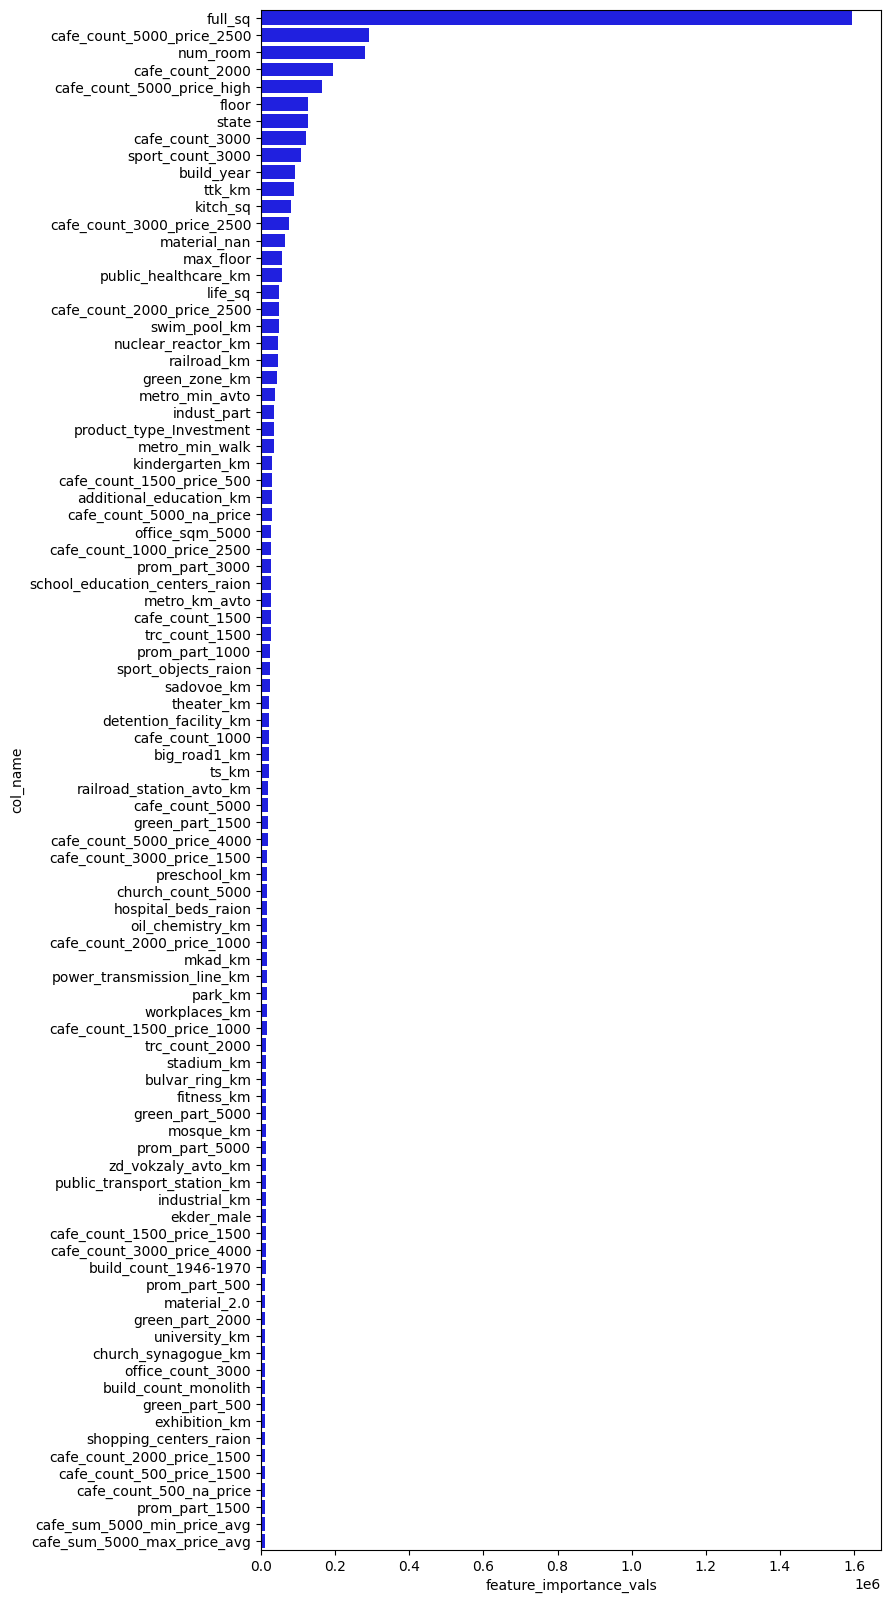

In [14]:
rmsles = np.array(rmsles)
print(rmsles)

for features in most_important_features:
    display(features.head(10))

limit = 90
for feats in most_important_features:
    plt.figure(figsize=(8, 20))
    sns.barplot(x="feature_importance_vals", y="col_name", data=feats.iloc[:limit],
            color="b")

# Choosing Top K features

In [15]:
from tqdm import tqdm

In [17]:
most_important_features_ = most_important_features[0]

step = 5
limit = 101
start = 10
features = most_important_features_.values[:, 0]
# features = most_important_features.values[:, 0]
rmsles = {}
for i in tqdm(range(start, limit, step), desc="Num Features"):
    print(f"Training for {i} features")
    model =  XGBRegressor(
                    # verbosity=0,
                    device=xgb_params['device'],
                    objective=xgb_params['objective'],
                    eval_metric=xgb_params['eval_metric'],
                    enable_categorical=xgb_params['enable_categorical'],
                    early_stopping_rounds=xgb_params['early_stopping_rounds'],
                    n_jobs=xgb_params['n_jobs'],

                    **best_params
                )
    
    # Train
    rmsles_, _ = cal_mean_errors(train_df, [model], features[:i], seed=seed)
    rmsles[i] = rmsles_  

Num Features:   0%|          | 0/19 [00:00<?, ?it/s]

Training for 10 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 15 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 20 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 25 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 30 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 35 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 40 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 45 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 50 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 55 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 60 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 65 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 70 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 75 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 80 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 85 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 90 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 95 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Training for 100 features


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Text(0, 0.5, 'RMSE')

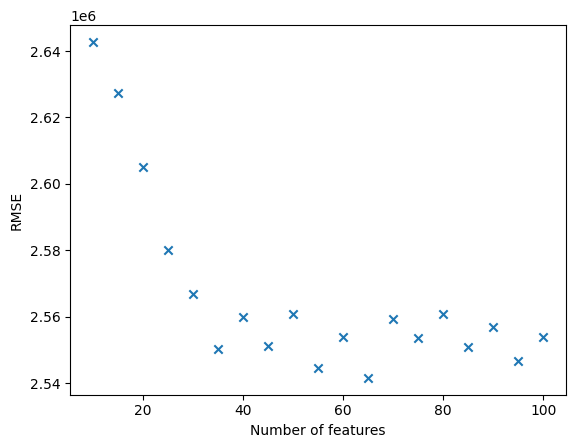

In [40]:
plt.scatter(rmsles.keys(), rmsles.values(), marker='x')
plt.xlabel('Number of features')
plt.ylabel('RMSE')

In [19]:
ordered_feats = sorted(rmsles.keys(), key=rmsles.get)
ordered_feats

[65, 55, 95, 35, 85, 45, 75, 100, 60, 90, 70, 40, 80, 50, 30, 25, 20, 15, 10]

In [33]:
feats_to_use = most_important_features_[:ordered_feats[len(ordered_feats)//2]].values[:, 0].tolist()
feats_to_use


['full_sq',
 'cafe_count_5000_price_2500',
 'num_room',
 'cafe_count_2000',
 'cafe_count_5000_price_high',
 'floor',
 'state',
 'cafe_count_3000',
 'sport_count_3000',
 'build_year',
 'ttk_km',
 'kitch_sq',
 'cafe_count_3000_price_2500',
 'material_nan',
 'max_floor',
 'public_healthcare_km',
 'life_sq',
 'cafe_count_2000_price_2500',
 'swim_pool_km',
 'nuclear_reactor_km',
 'railroad_km',
 'green_zone_km',
 'metro_min_avto',
 'indust_part',
 'product_type_Investment',
 'metro_min_walk',
 'kindergarten_km',
 'cafe_count_1500_price_500',
 'additional_education_km',
 'cafe_count_5000_na_price',
 'office_sqm_5000',
 'cafe_count_1000_price_2500',
 'prom_part_3000',
 'school_education_centers_raion',
 'metro_km_avto',
 'cafe_count_1500',
 'trc_count_1500',
 'prom_part_1000',
 'sport_objects_raion',
 'sadovoe_km',
 'theater_km',
 'detention_facility_km',
 'cafe_count_1000',
 'big_road1_km',
 'ts_km',
 'railroad_station_avto_km',
 'cafe_count_5000',
 'green_part_1500',
 'cafe_count_5000_price

# Predicting

In [29]:
def train(X, y, evalset=None):    
    model =  XGBRegressor(
                    # verbosity=0,
                    device=xgb_params['device'],
                    objective=xgb_params['objective'],
                    eval_metric=xgb_params['eval_metric'],
                    enable_categorical=xgb_params['enable_categorical'],
                    early_stopping_rounds=xgb_params['early_stopping_rounds'],
                    n_jobs=xgb_params['n_jobs'],

                    **best_params
                )
    if not evalset:
        model.fit(X, y, verbose=True)
    else:
        model.fit(X, y, eval_set=evalset, verbose=True)

    return model

def find_best_model(processed_df):
    # Return best model from kfolds
    best_model = None
    min_loss = float('inf')
    to_return = []
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(cv.split(processed_df)):
        X_train = processed_df.iloc[train_idx]
        y_train = X_train["price_doc"]
        X_train.drop(["price_doc"], axis=1, inplace=True)

        X_val = processed_df.iloc[test_idx]
        y_val = X_val["price_doc"]
        X_val.drop(["price_doc"], axis=1, inplace=True)

        evalset = [(X_val, y_val)]
        model = train(X_train, y_train, evalset)

        pred = model.predict(X_val)
        loss = mean_squared_error(y_val, pred, squared=False)
        
        to_return.append((model, loss))

        # if loss < min_loss:
        #     min_loss = loss
        #     best_model = model
    
    return to_return

In [30]:
processed_train = pd.read_csv('processed/processed_train_2.csv')

In [34]:
models = find_best_model(processed_train[feats_to_use+['price_doc']])
sorted_models = sorted(models, key=lambda x: x[1])


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.62386
[1]	validation_0-rmsle:0.61354
[2]	validation_0-rmsle:0.60445
[3]	validation_0-rmsle:0.59617
[4]	validation_0-rmsle:0.58854
[5]	validation_0-rmsle:0.58189


[09:46:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[6]	validation_0-rmsle:0.57563
[7]	validation_0-rmsle:0.57008
[8]	validation_0-rmsle:0.56484
[9]	validation_0-rmsle:0.55980
[10]	validation_0-rmsle:0.55522
[11]	validation_0-rmsle:0.55099
[12]	validation_0-rmsle:0.54723
[13]	validation_0-rmsle:0.54358
[14]	validation_0-rmsle:0.54019
[15]	validation_0-rmsle:0.53707
[16]	validation_0-rmsle:0.53421
[17]	validation_0-rmsle:0.53142
[18]	validation_0-rmsle:0.52869
[19]	validation_0-rmsle:0.52657
[20]	validation_0-rmsle:0.52432
[21]	validation_0-rmsle:0.52222
[22]	validation_0-rmsle:0.52012
[23]	validation_0-rmsle:0.51838
[24]	validation_0-rmsle:0.51654
[25]	validation_0-rmsle:0.51482
[26]	validation_0-rmsle:0.51328
[27]	validation_0-rmsle:0.51172
[28]	validation_0-rmsle:0.51038
[29]	validation_0-rmsle:0.50905
[30]	validation_0-rmsle:0.50766
[31]	validation_0-rmsle:0.50647
[32]	validation_0-rmsle:0.50536
[33]	validation_0-rmsle:0.50444
[34]	validation_0-rmsle:0.50330
[35]	validation_0-rmsle:0.50224
[36]	validation_0-rmsle:0.50130
[37]	validat

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.60382
[1]	validation_0-rmsle:0.59378
[2]	validation_0-rmsle:0.58481
[3]	validation_0-rmsle:0.57654
[4]	validation_0-rmsle:0.56900
[5]	validation_0-rmsle:0.56216
[6]	validation_0-rmsle:0.55590
[7]	validation_0-rmsle:0.55015
[8]	validation_0-rmsle:0.54483
[9]	validation_0-rmsle:0.53979
[10]	validation_0-rmsle:0.53515
[11]	validation_0-rmsle:0.53087
[12]	validation_0-rmsle:0.52697
[13]	validation_0-rmsle:0.52334
[14]	validation_0-rmsle:0.51971
[15]	validation_0-rmsle:0.51655
[16]	validation_0-rmsle:0.51354


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:46:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[17]	validation_0-rmsle:0.51055
[18]	validation_0-rmsle:0.50786
[19]	validation_0-rmsle:0.50545
[20]	validation_0-rmsle:0.50304
[21]	validation_0-rmsle:0.50088
[22]	validation_0-rmsle:0.49860
[23]	validation_0-rmsle:0.49669
[24]	validation_0-rmsle:0.49463
[25]	validation_0-rmsle:0.49290
[26]	validation_0-rmsle:0.49117
[27]	validation_0-rmsle:0.48952
[28]	validation_0-rmsle:0.48813
[29]	validation_0-rmsle:0.48676
[30]	validation_0-rmsle:0.48563
[31]	validation_0-rmsle:0.48438
[32]	validation_0-rmsle:0.48329
[33]	validation_0-rmsle:0.48215
[34]	validation_0-rmsle:0.48117
[35]	validation_0-rmsle:0.48035
[36]	validation_0-rmsle:0.47933
[37]	validation_0-rmsle:0.47845
[38]	validation_0-rmsle:0.47763
[39]	validation_0-rmsle:0.47690
[40]	validation_0-rmsle:0.47613
[41]	validation_0-rmsle:0.47554
[42]	validation_0-rmsle:0.47485
[43]	validation_0-rmsle:0.47424
[44]	validation_0-rmsle:0.47371
[45]	validation_0-rmsle:0.47300
[46]	validation_0-rmsle:0.47242
[47]	validation_0-rmsle:0.47200
[48]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.59971
[1]	validation_0-rmsle:0.58956
[2]	validation_0-rmsle:0.58054
[3]	validation_0-rmsle:0.57237
[4]	validation_0-rmsle:0.56496
[5]	validation_0-rmsle:0.55808
[6]	validation_0-rmsle:0.55193
[7]	validation_0-rmsle:0.54630
[8]	validation_0-rmsle:0.54097
[9]	validation_0-rmsle:0.53625
[10]	validation_0-rmsle:0.53162
[11]	validation_0-rmsle:0.52760
[12]	validation_0-rmsle:0.52398
[13]	validation_0-rmsle:0.52050
[14]	validation_0-rmsle:0.51714
[15]	validation_0-rmsle:0.51392
[16]	validation_0-rmsle:0.51101


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[17]	validation_0-rmsle:0.50810
[18]	validation_0-rmsle:0.50561
[19]	validation_0-rmsle:0.50329
[20]	validation_0-rmsle:0.50105
[21]	validation_0-rmsle:0.49883
[22]	validation_0-rmsle:0.49687
[23]	validation_0-rmsle:0.49503
[24]	validation_0-rmsle:0.49332
[25]	validation_0-rmsle:0.49170
[26]	validation_0-rmsle:0.49021
[27]	validation_0-rmsle:0.48887
[28]	validation_0-rmsle:0.48741
[29]	validation_0-rmsle:0.48624
[30]	validation_0-rmsle:0.48513
[31]	validation_0-rmsle:0.48396
[32]	validation_0-rmsle:0.48300
[33]	validation_0-rmsle:0.48214
[34]	validation_0-rmsle:0.48121
[35]	validation_0-rmsle:0.48042
[36]	validation_0-rmsle:0.47961
[37]	validation_0-rmsle:0.47884
[38]	validation_0-rmsle:0.47819
[39]	validation_0-rmsle:0.47754
[40]	validation_0-rmsle:0.47688
[41]	validation_0-rmsle:0.47641
[42]	validation_0-rmsle:0.47574
[43]	validation_0-rmsle:0.47508
[44]	validation_0-rmsle:0.47451
[45]	validation_0-rmsle:0.47394
[46]	validation_0-rmsle:0.47340
[47]	validation_0-rmsle:0.47273
[48]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61238
[1]	validation_0-rmsle:0.60209
[2]	validation_0-rmsle:0.59316
[3]	validation_0-rmsle:0.58542
[4]	validation_0-rmsle:0.57810
[5]	validation_0-rmsle:0.57159
[6]	validation_0-rmsle:0.56566
[7]	validation_0-rmsle:0.56016
[8]	validation_0-rmsle:0.55502
[9]	validation_0-rmsle:0.55029
[10]	validation_0-rmsle:0.54600
[11]	validation_0-rmsle:0.54194
[12]	validation_0-rmsle:0.53837
[13]	validation_0-rmsle:0.53493
[14]	validation_0-rmsle:0.53167
[15]	validation_0-rmsle:0.52861
[16]	validation_0-rmsle:0.52582
[17]	validation_0-rmsle:0.52315
[18]	validation_0-rmsle:0.52088
[19]	validation_0-rmsle:0.51853


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[20]	validation_0-rmsle:0.51635
[21]	validation_0-rmsle:0.51437
[22]	validation_0-rmsle:0.51243
[23]	validation_0-rmsle:0.51057
[24]	validation_0-rmsle:0.50893
[25]	validation_0-rmsle:0.50742
[26]	validation_0-rmsle:0.50602
[27]	validation_0-rmsle:0.50469
[28]	validation_0-rmsle:0.50322
[29]	validation_0-rmsle:0.50198
[30]	validation_0-rmsle:0.50092
[31]	validation_0-rmsle:0.49990
[32]	validation_0-rmsle:0.49891
[33]	validation_0-rmsle:0.49792
[34]	validation_0-rmsle:0.49683
[35]	validation_0-rmsle:0.49608
[36]	validation_0-rmsle:0.49509
[37]	validation_0-rmsle:0.49415
[38]	validation_0-rmsle:0.49330
[39]	validation_0-rmsle:0.49260
[40]	validation_0-rmsle:0.49197
[41]	validation_0-rmsle:0.49140
[42]	validation_0-rmsle:0.49070
[43]	validation_0-rmsle:0.49009
[44]	validation_0-rmsle:0.48962
[45]	validation_0-rmsle:0.48903
[46]	validation_0-rmsle:0.48845
[47]	validation_0-rmsle:0.48801
[48]	validation_0-rmsle:0.48748
[49]	validation_0-rmsle:0.48698
[50]	validation_0-rmsle:0.48654
[51]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61636
[1]	validation_0-rmsle:0.60573
[2]	validation_0-rmsle:0.59607
[3]	validation_0-rmsle:0.58751
[4]	validation_0-rmsle:0.57957
[5]	validation_0-rmsle:0.57214
[6]	validation_0-rmsle:0.56544
[7]	validation_0-rmsle:0.55912
[8]	validation_0-rmsle:0.55354
[9]	validation_0-rmsle:0.54827
[10]	validation_0-rmsle:0.54358
[11]	validation_0-rmsle:0.53900
[12]	validation_0-rmsle:0.53477
[13]	validation_0-rmsle:0.53096
[14]	validation_0-rmsle:0.52726
[15]	validation_0-rmsle:0.52388
[16]	validation_0-rmsle:0.52087
[17]	validation_0-rmsle:0.51785
[18]	validation_0-rmsle:0.51505


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:46:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[19]	validation_0-rmsle:0.51281
[20]	validation_0-rmsle:0.51036
[21]	validation_0-rmsle:0.50801
[22]	validation_0-rmsle:0.50573
[23]	validation_0-rmsle:0.50377
[24]	validation_0-rmsle:0.50185
[25]	validation_0-rmsle:0.50015
[26]	validation_0-rmsle:0.49844
[27]	validation_0-rmsle:0.49704
[28]	validation_0-rmsle:0.49562
[29]	validation_0-rmsle:0.49425
[30]	validation_0-rmsle:0.49299
[31]	validation_0-rmsle:0.49157
[32]	validation_0-rmsle:0.49042
[33]	validation_0-rmsle:0.48927
[34]	validation_0-rmsle:0.48826
[35]	validation_0-rmsle:0.48739
[36]	validation_0-rmsle:0.48634
[37]	validation_0-rmsle:0.48540
[38]	validation_0-rmsle:0.48462
[39]	validation_0-rmsle:0.48374
[40]	validation_0-rmsle:0.48299
[41]	validation_0-rmsle:0.48228
[42]	validation_0-rmsle:0.48165
[43]	validation_0-rmsle:0.48094
[44]	validation_0-rmsle:0.48023
[45]	validation_0-rmsle:0.47986
[46]	validation_0-rmsle:0.47927
[47]	validation_0-rmsle:0.47872
[48]	validation_0-rmsle:0.47830
[49]	validation_0-rmsle:0.47773
[50]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61937
[1]	validation_0-rmsle:0.60866
[2]	validation_0-rmsle:0.59936
[3]	validation_0-rmsle:0.59074
[4]	validation_0-rmsle:0.58289
[5]	validation_0-rmsle:0.57585
[6]	validation_0-rmsle:0.56930
[7]	validation_0-rmsle:0.56341
[8]	validation_0-rmsle:0.55796
[9]	validation_0-rmsle:0.55304
[10]	validation_0-rmsle:0.54834
[11]	validation_0-rmsle:0.54380
[12]	validation_0-rmsle:0.53981
[13]	validation_0-rmsle:0.53597
[14]	validation_0-rmsle:0.53257
[15]	validation_0-rmsle:0.52933
[16]	validation_0-rmsle:0.52602
[17]	validation_0-rmsle:0.52323
[18]	validation_0-rmsle:0.52049


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[19]	validation_0-rmsle:0.51804
[20]	validation_0-rmsle:0.51571
[21]	validation_0-rmsle:0.51344
[22]	validation_0-rmsle:0.51145
[23]	validation_0-rmsle:0.50946
[24]	validation_0-rmsle:0.50756
[25]	validation_0-rmsle:0.50567
[26]	validation_0-rmsle:0.50395
[27]	validation_0-rmsle:0.50242
[28]	validation_0-rmsle:0.50098
[29]	validation_0-rmsle:0.49965
[30]	validation_0-rmsle:0.49851
[31]	validation_0-rmsle:0.49737
[32]	validation_0-rmsle:0.49639
[33]	validation_0-rmsle:0.49532
[34]	validation_0-rmsle:0.49435
[35]	validation_0-rmsle:0.49329
[36]	validation_0-rmsle:0.49231
[37]	validation_0-rmsle:0.49142
[38]	validation_0-rmsle:0.49052
[39]	validation_0-rmsle:0.48976
[40]	validation_0-rmsle:0.48890
[41]	validation_0-rmsle:0.48823
[42]	validation_0-rmsle:0.48768
[43]	validation_0-rmsle:0.48686
[44]	validation_0-rmsle:0.48616
[45]	validation_0-rmsle:0.48555
[46]	validation_0-rmsle:0.48488
[47]	validation_0-rmsle:0.48431
[48]	validation_0-rmsle:0.48372
[49]	validation_0-rmsle:0.48320
[50]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61761
[1]	validation_0-rmsle:0.60840
[2]	validation_0-rmsle:0.60003
[3]	validation_0-rmsle:0.59264
[4]	validation_0-rmsle:0.58622
[5]	validation_0-rmsle:0.58017
[6]	validation_0-rmsle:0.57474
[7]	validation_0-rmsle:0.56958
[8]	validation_0-rmsle:0.56501
[9]	validation_0-rmsle:0.56071
[10]	validation_0-rmsle:0.55690
[11]	validation_0-rmsle:0.55337
[12]	validation_0-rmsle:0.55005
[13]	validation_0-rmsle:0.54708
[14]	validation_0-rmsle:0.54419
[15]	validation_0-rmsle:0.54151
[16]	validation_0-rmsle:0.53902
[17]	validation_0-rmsle:0.53679
[18]	validation_0-rmsle:0.53467
[19]	validation_0-rmsle:0.53254
[20]	validation_0-rmsle:0.53063


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[21]	validation_0-rmsle:0.52892
[22]	validation_0-rmsle:0.52720
[23]	validation_0-rmsle:0.52549
[24]	validation_0-rmsle:0.52402
[25]	validation_0-rmsle:0.52259
[26]	validation_0-rmsle:0.52129
[27]	validation_0-rmsle:0.52010
[28]	validation_0-rmsle:0.51895
[29]	validation_0-rmsle:0.51779
[30]	validation_0-rmsle:0.51677
[31]	validation_0-rmsle:0.51584
[32]	validation_0-rmsle:0.51498
[33]	validation_0-rmsle:0.51410
[34]	validation_0-rmsle:0.51323
[35]	validation_0-rmsle:0.51258
[36]	validation_0-rmsle:0.51191
[37]	validation_0-rmsle:0.51126
[38]	validation_0-rmsle:0.51061
[39]	validation_0-rmsle:0.50999
[40]	validation_0-rmsle:0.50944
[41]	validation_0-rmsle:0.50886
[42]	validation_0-rmsle:0.50843
[43]	validation_0-rmsle:0.50793
[44]	validation_0-rmsle:0.50756
[45]	validation_0-rmsle:0.50717
[46]	validation_0-rmsle:0.50657
[47]	validation_0-rmsle:0.50622
[48]	validation_0-rmsle:0.50567
[49]	validation_0-rmsle:0.50531
[50]	validation_0-rmsle:0.50499
[51]	validation_0-rmsle:0.50462
[52]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61612
[1]	validation_0-rmsle:0.60734
[2]	validation_0-rmsle:0.59914
[3]	validation_0-rmsle:0.59192
[4]	validation_0-rmsle:0.58518
[5]	validation_0-rmsle:0.57889
[6]	validation_0-rmsle:0.57337
[7]	validation_0-rmsle:0.56818
[8]	validation_0-rmsle:0.56366
[9]	validation_0-rmsle:0.55912
[10]	validation_0-rmsle:0.55539
[11]	validation_0-rmsle:0.55158
[12]	validation_0-rmsle:0.54832
[13]	validation_0-rmsle:0.54511
[14]	validation_0-rmsle:0.54231


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:47:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[15]	validation_0-rmsle:0.53971
[16]	validation_0-rmsle:0.53712
[17]	validation_0-rmsle:0.53453
[18]	validation_0-rmsle:0.53231
[19]	validation_0-rmsle:0.53016
[20]	validation_0-rmsle:0.52828
[21]	validation_0-rmsle:0.52633
[22]	validation_0-rmsle:0.52464
[23]	validation_0-rmsle:0.52290
[24]	validation_0-rmsle:0.52149
[25]	validation_0-rmsle:0.51993
[26]	validation_0-rmsle:0.51863
[27]	validation_0-rmsle:0.51722
[28]	validation_0-rmsle:0.51588
[29]	validation_0-rmsle:0.51474
[30]	validation_0-rmsle:0.51379
[31]	validation_0-rmsle:0.51272
[32]	validation_0-rmsle:0.51163
[33]	validation_0-rmsle:0.51076
[34]	validation_0-rmsle:0.50997
[35]	validation_0-rmsle:0.50911
[36]	validation_0-rmsle:0.50844
[37]	validation_0-rmsle:0.50770
[38]	validation_0-rmsle:0.50699
[39]	validation_0-rmsle:0.50634
[40]	validation_0-rmsle:0.50569
[41]	validation_0-rmsle:0.50513
[42]	validation_0-rmsle:0.50451
[43]	validation_0-rmsle:0.50398
[44]	validation_0-rmsle:0.50329
[45]	validation_0-rmsle:0.50278
[46]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.64126
[1]	validation_0-rmsle:0.63095
[2]	validation_0-rmsle:0.62148
[3]	validation_0-rmsle:0.61284
[4]	validation_0-rmsle:0.60541
[5]	validation_0-rmsle:0.59849
[6]	validation_0-rmsle:0.59186
[7]	validation_0-rmsle:0.58612
[8]	validation_0-rmsle:0.58043
[9]	validation_0-rmsle:0.57549
[10]	validation_0-rmsle:0.57110
[11]	validation_0-rmsle:0.56680
[12]	validation_0-rmsle:0.56276
[13]	validation_0-rmsle:0.55877
[14]	validation_0-rmsle:0.55532
[15]	validation_0-rmsle:0.55197
[16]	validation_0-rmsle:0.54900
[17]	validation_0-rmsle:0.54604
[18]	validation_0-rmsle:0.54339
[19]	validation_0-rmsle:0.54112
[20]	validation_0-rmsle:0.53897


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:47:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[21]	validation_0-rmsle:0.53688
[22]	validation_0-rmsle:0.53501
[23]	validation_0-rmsle:0.53303
[24]	validation_0-rmsle:0.53116
[25]	validation_0-rmsle:0.52954
[26]	validation_0-rmsle:0.52796
[27]	validation_0-rmsle:0.52661
[28]	validation_0-rmsle:0.52526
[29]	validation_0-rmsle:0.52392
[30]	validation_0-rmsle:0.52263
[31]	validation_0-rmsle:0.52148
[32]	validation_0-rmsle:0.52044
[33]	validation_0-rmsle:0.51935
[34]	validation_0-rmsle:0.51837
[35]	validation_0-rmsle:0.51757
[36]	validation_0-rmsle:0.51685
[37]	validation_0-rmsle:0.51603
[38]	validation_0-rmsle:0.51531
[39]	validation_0-rmsle:0.51465
[40]	validation_0-rmsle:0.51396
[41]	validation_0-rmsle:0.51324
[42]	validation_0-rmsle:0.51263
[43]	validation_0-rmsle:0.51204
[44]	validation_0-rmsle:0.51150
[45]	validation_0-rmsle:0.51102
[46]	validation_0-rmsle:0.51056
[47]	validation_0-rmsle:0.51016
[48]	validation_0-rmsle:0.50975
[49]	validation_0-rmsle:0.50942
[50]	validation_0-rmsle:0.50912
[51]	validation_0-rmsle:0.50866
[52]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spars

[0]	validation_0-rmsle:0.61310
[1]	validation_0-rmsle:0.60322
[2]	validation_0-rmsle:0.59417
[3]	validation_0-rmsle:0.58606
[4]	validation_0-rmsle:0.57859
[5]	validation_0-rmsle:0.57187
[6]	validation_0-rmsle:0.56561
[7]	validation_0-rmsle:0.55990
[8]	validation_0-rmsle:0.55457
[9]	validation_0-rmsle:0.54957
[10]	validation_0-rmsle:0.54505
[11]	validation_0-rmsle:0.54070
[12]	validation_0-rmsle:0.53683
[13]	validation_0-rmsle:0.53315
[14]	validation_0-rmsle:0.52974
[15]	validation_0-rmsle:0.52661
[16]	validation_0-rmsle:0.52363
[17]	validation_0-rmsle:0.52072
[18]	validation_0-rmsle:0.51806


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
[09:47:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "mind_child_weight" } are not used.



[19]	validation_0-rmsle:0.51588
[20]	validation_0-rmsle:0.51350
[21]	validation_0-rmsle:0.51128
[22]	validation_0-rmsle:0.50918
[23]	validation_0-rmsle:0.50704
[24]	validation_0-rmsle:0.50533
[25]	validation_0-rmsle:0.50340
[26]	validation_0-rmsle:0.50184
[27]	validation_0-rmsle:0.50039
[28]	validation_0-rmsle:0.49876
[29]	validation_0-rmsle:0.49745
[30]	validation_0-rmsle:0.49610
[31]	validation_0-rmsle:0.49487
[32]	validation_0-rmsle:0.49389
[33]	validation_0-rmsle:0.49281
[34]	validation_0-rmsle:0.49190
[35]	validation_0-rmsle:0.49091
[36]	validation_0-rmsle:0.48997
[37]	validation_0-rmsle:0.48916
[38]	validation_0-rmsle:0.48827
[39]	validation_0-rmsle:0.48736
[40]	validation_0-rmsle:0.48671
[41]	validation_0-rmsle:0.48598
[42]	validation_0-rmsle:0.48535
[43]	validation_0-rmsle:0.48467
[44]	validation_0-rmsle:0.48413
[45]	validation_0-rmsle:0.48358
[46]	validation_0-rmsle:0.48306
[47]	validation_0-rmsle:0.48262
[48]	validation_0-rmsle:0.48202
[49]	validation_0-rmsle:0.48150
[50]	val

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [36]:
for m in sorted_models:
    print(m[1])

2268515.2273082915
2334141.4420072935
2351920.634118119
2408901.313924034
2426660.2588992915
2504373.0377764194
2516198.9774472336
2590568.567665112
2703233.9234966286
3207258.7234914415


In [37]:
median_model = sorted_models[len(sorted_models)//2][0]

In [38]:
test_path = 'processed/processed_test_2.csv'
test_id_path = '../../Dataset/test.csv/test.csv'
output_path = 'output/'
processed_test = pd.read_csv(test_path)
test_id = pd.read_csv(test_id_path)

In [39]:
for i, (model, _) in enumerate(sorted_models):
    pred = model.predict(processed_test[feats_to_use])
    # Save predictions
    prediction_df = pd.DataFrame({
        'id': test_id['id'],
        'price_doc': pred
    })

    prediction_df.to_csv(f'{output_path}/xgb_pred_{i}.csv', index=False)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated 